In [12]:
import warnings
from pprint import pprint
from collections import Counter
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from graphrole import RecursiveFeatureExtractor, RoleExtractor
import seaborn as sns
import numpy as np

In [3]:
students = pd.read_csv("../data/6-student_merged.csv", sep=";", dtype={'from_hei': "string", 'to_hei': "string", 'level': 'category', 'language:': "category",
                       'year': "category", 'gender': "category", 'nationality': "category", 'previous': "category", 'qualification': "category", 'languageprep': "category"})

#Remove white spaces
students['from_hei'] = students['from_hei'].str.replace(" ", "_")
students['to_hei'] = students['to_hei'].str.replace(" ", "_")

# print(students.dtypes)

In [4]:
G = nx.DiGraph()
print("# of nodes: ", G.number_of_nodes())
print("# of edges: ", G.number_of_edges())

# of nodes:  0
# of edges:  0


In [5]:
grouped_st = students.groupby(['from_hei', 'to_hei'])
for key, el in grouped_st:
    G.add_edge(key[0], key[1], weight=len(el))

# Visualization

In [6]:
import random
import matplotlib.pyplot as plt
import warnings

In [7]:
nodes = G.nodes()
#random.seed(42)

random_nodes = random.sample(nodes, int(len(nodes)/50))
print(len(random_nodes))

65


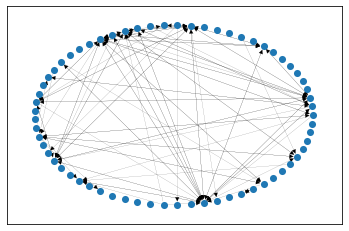

In [8]:
sub_G = G.subgraph(random_nodes)

# plot graph
plt.figure()

with warnings.catch_warnings():
    # catch matplotlib deprecation warning
    warnings.simplefilter('ignore')
    nx.draw_networkx(
        sub_G,
        pos=nx.nx.circular_layout(sub_G),
        node_size = 50,
        with_labels = False,
        linewidths = 0,
        width = 0.1,
    )

plt.show()

# Extract roles

In [13]:
feature_extractor = RecursiveFeatureExtractor(G, max_generations=10)
features = feature_extractor.extract_features()

In [14]:
role_extractor = RoleExtractor(n_roles=None)
role_extractor.extract_role_factors(features)
node_roles = role_extractor.roles
print("")

In [34]:
role_count = Counter(node_roles.values())
pprint(role_count)

Counter({'role_1': 1208,
         'role_4': 578,
         'role_0': 513,
         'role_6': 325,
         'role_2': 255,
         'role_3': 169,
         'role_7': 138,
         'role_5': 106})


In [31]:
nodes = list(nodes)
#print(list(nodes))

roles_values = list(node_roles.values())

nodes_role = [(nodes[i], roles_values[i]) for i in range(len(nodes))]
print(nodes_role)

_KLAIPED09', 'role_1'), ('PL_WARSZAW61', 'role_4'), ('UK_LONDON055', 'role_6'), ('F__REIMS09', 'role_1'), ('P__COIMBRA22', 'role_4'), ('PL_SZCZECI03', 'role_1'), ('PL_WARSZAW28', 'role_1'), ('E__BARCELO111', 'role_1'), ('F__METZ28', 'role_1'), ('LUXLUX-VIL03', 'role_3'), ('PL_KROSNO01', 'role_1'), ('P__PORTIMA02', 'role_1'), ('UK_SWANSEA02', 'role_0'), ('P__LISBOA47', 'role_1'), ('I__CUNEO02', 'role_4'), ('E__BARCELO45', 'role_4'), ('E__BARCELO55', 'role_4'), ('F__BAYONNE07', 'role_4'), ('F__NANCY41', 'role_4'), ('F__PARIS376', 'role_0'), ('F__TOULOUS116', 'role_1'), ('I__PALERMO05', 'role_1'), ('I__RAVENNA01', 'role_0'), ('PL_DABROWA01', 'role_3'), ('PL_LUBIN02', 'role_4'), ('PL_POZNAN19', 'role_7'), ('F__LILLE45', 'role_1'), ('RO_TARGOVI01', 'role_1'), ('E__CACERES11', 'role_1'), ('B__GENT41', 'role_2'), ('F__BAYONNE10', 'role_7'), ('F__LE-MANS15', 'role_0'), ('F__RODEZ09', 'role_1'), ('PL_JOZEFOW01', 'role_2'), ('RO_PLOIEST01', 'role_7'), ('E__CASTELL04', 'role_1'), ('PL_POZNAN17', 

# Plot per role

In [ ]:
chosen_role = 'role_1'

chosen_nodes = [n for n,v in nodes_role if v == chosen_role]

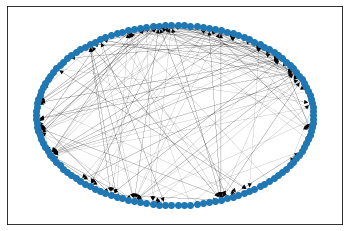

In [47]:
'''
Counter({'role_1': 1208,
         'role_4': 578,
         'role_0': 513,
         'role_6': 325,
         'role_2': 255,
         'role_3': 169,
         'role_7': 138,
         'role_5': 106})
'''

chosen_role = 'role_7'
percentage = 1 #From 0 to 1: 0.1% means 10 percent of the nodes

chosen_nodes = [n for n,v in nodes_role if v == chosen_role]

chosen_nodes = random.sample(chosen_nodes, int(len(chosen_nodes)*percentage))

sub_G = G.subgraph(chosen_nodes)

# plot graph
plt.figure()

with warnings.catch_warnings():
    # catch matplotlib deprecation warning
    warnings.simplefilter('ignore')
    nx.draw_networkx(
        sub_G,
        pos=nx.nx.circular_layout(sub_G),
        node_size = 50,
        with_labels = False,
        linewidths = 0,
        width = 0.1,
    )

plt.show()